In [1]:
from ete3 import Tree, faces, AttrFace, TreeStyle, NodeStyle, TextFace

import pandas as pd
import numpy as np

from Bio import SeqIO, Seq, AlignIO

# Construct trees for:

### 1. P_unique_HeV = all unique phosphoprotein sequences, outgroup = HeV
### 2. P_no_stop_codons_HeV = one sequence less than P_unique_HeV because of premature stop codon. USE THIS TREE FOR HYPOTHESIS TESTING.
### 3. P_BGD_dedup_HeV = Bangladesh sequences only, outgroup = HeV
### 4. P_whitmer_BGD = Whitmer et al. isolates, use midpoint rooting.

In [2]:
P_seqs = [seq.id for seq in SeqIO.parse("seq_for_analysis/P_unique_HeV.fasta", "fasta")]
metadata = pd.read_csv("metadata_all.csv").query("ID in @P_seqs").reset_index(drop=True)

# M_clade = metadata.query("Country in ['Malaysia', 'Cambodia']").ID.values
# B_clade = metadata.query("Country in ['Bangladesh', 'Thailand']").ID.values
# I_clade = metadata.query("Country in ['India']").ID.values

In [4]:
metadata["country_color"] = metadata["Country"].map({"Malaysia": "purple",
                                                     "India": "darkgreen",
                                                     "Bangladesh": "blue",
                                                     "Thailand": "black",
                                                     "Australia": "orange",
                                                     "Cambodia": "gray"
                                                    })

# need a dictionary mapping every node name to a color
country_color_dict = dict(zip(metadata["ID"], metadata["country_color"]))

In [5]:
def node_layout(color_dict):
    
    def layout(node):
        if node.is_leaf():
            #print(country_col_dict[node.name])
            
            if node.name in list(color_dict.keys()):
                font_color = color_dict[node.name]
            else:
                font_color = "black"
            
            N = AttrFace("name", 
                         fgcolor=font_color, 
                         fsize=7)
            faces.add_face_to_node(N, node, 0, 
                                  position='branch-top'
                                  )
    return layout

def basic_tree(tree_file, color_dict, out_group=None):
    
    t = Tree(tree_file)
    t.ladderize()
    
    if out_group is not None:
        t.set_outgroup(out_group)
    
    for n in t.traverse():
        nstyle = NodeStyle()
        nstyle["fgcolor"] = "black"
        nstyle["size"] = 1
        n.set_style(nstyle)
    
    ts = TreeStyle()
    ts.layout_fn = node_layout(color_dict)
    ts.show_leaf_name = False
    ts.show_branch_support = True
    #ts.title.add_face(TextFace("Phosphoprotein Sequences, 45", fsize=10), column=0)

    return t, ts

In [6]:
def tree_with_color_swatches(tree_file, color_dict, out_group=None):
    
    # Set dashed blue lines in all leaves
    nst1 = NodeStyle()
    nst1["bgcolor"] = "LightSteelBlue"
    nst1["fgcolor"] = "black"
    nst1["size"] = 1
    
    nst2 = NodeStyle()
    nst2["bgcolor"] = "Moccasin"
    nst2["fgcolor"] = "black"
    nst2["size"] = 1
    
    nst3 = NodeStyle()
    nst3["bgcolor"] = "DarkSeaGreen"
    nst3["fgcolor"] = "black"
    nst3["size"] = 1

    t = Tree(tree_file)
    t.ladderize()
    
    if out_group is not None:
        t.set_outgroup(out_group)
    
    for n in t.traverse():
        nstyle = NodeStyle()
        nstyle["fgcolor"] = "black"
        nstyle["size"] = 1
        n.set_style(nstyle)      

    # Bangladesh
    n1 = t.get_common_ancestor('AY988601', 'JN808857', 'JN808864', 'MK575060', 'MK575061',
       'MK575062', 'MK575067', 'MK575068', 'MK673565', 'MK673566',
       'MK673567', 'MK673568', 'MK673570', 'MK673571', 'MK673572',
       'MK673576', 'MK673579', 'MK673581', 'MK673582', 'MK673583',
       'MK673584', 'MK673585', 'MK673587', 'MK673588', 'MK673589',
       'MK673591', 'MK673592', 'MW535746')
    n1.set_style(nst1)
    
    # Malaysia
    n2 = t.get_common_ancestor('AF212302', 'AF376747', 'AJ627196', 'FN869553', 'MK673559',
       'MK801755')
    n2.set_style(nst2)
    
    # India
    n3 = t.get_common_ancestor('FJ513078', 'MH396625', 'MH523642', 'MN549402', 'MN549403',
       'MN549404', 'MN549405', 'MN549406', 'MN549409', 'MN549410')
    n3.set_style(nst3)
    
    ts = TreeStyle()
    ts.layout_fn = node_layout(color_dict)
    ts.show_leaf_name = False
    ts.show_branch_support = True
    #ts.title.add_face(TextFace("Phosphoprotein Sequences, 45", fsize=10), column=0)

    return t, ts

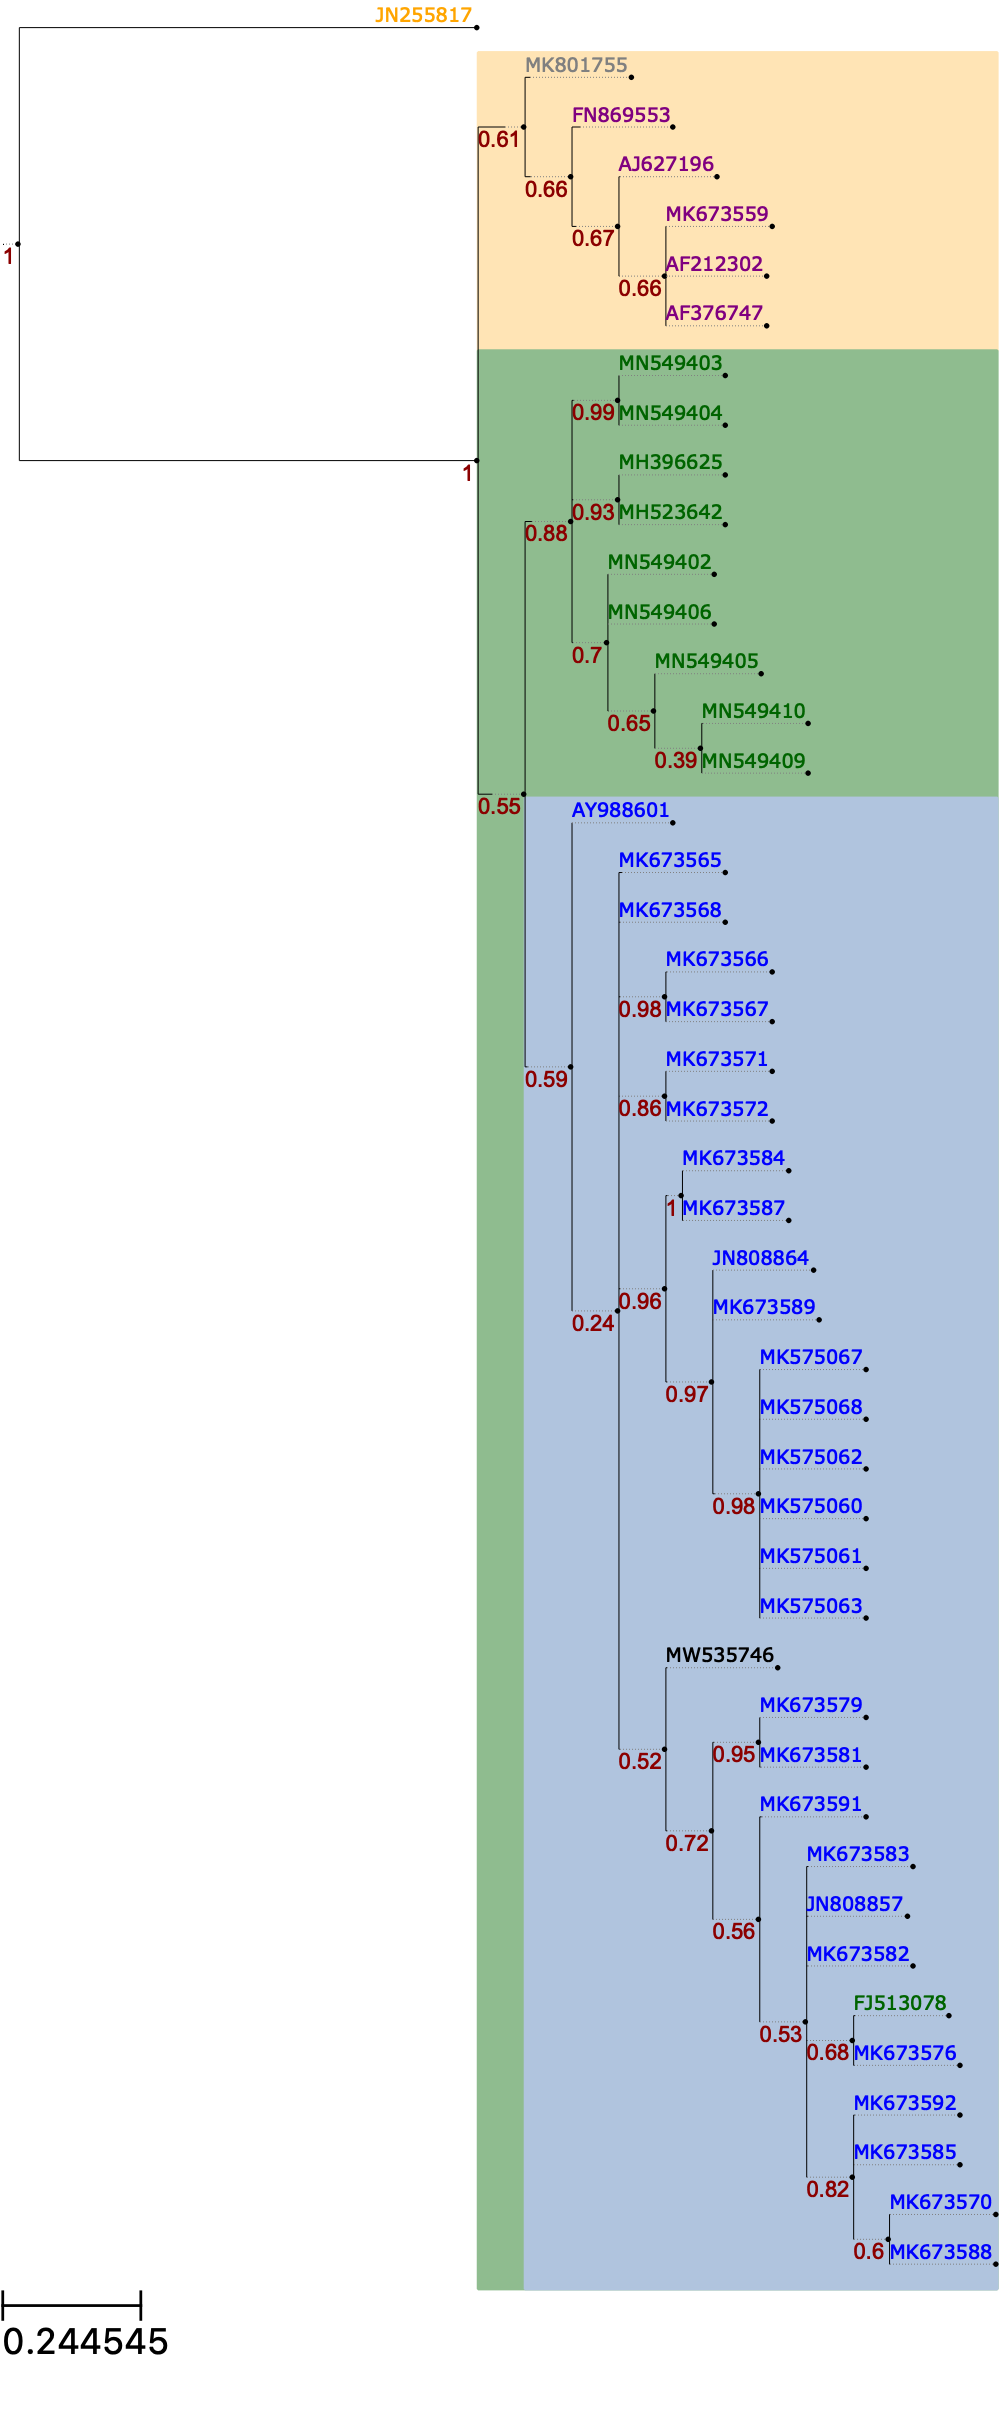

In [7]:
t, ts = tree_with_color_swatches("trees/P_unique_HeV_iqtree.nwk", country_color_dict, "JN255817")
t.render(w=1000, tree_style=ts,
         #file_name="trees/Figures/P_HeV_polytomies.png", 
         file_name="%%inline"
         )

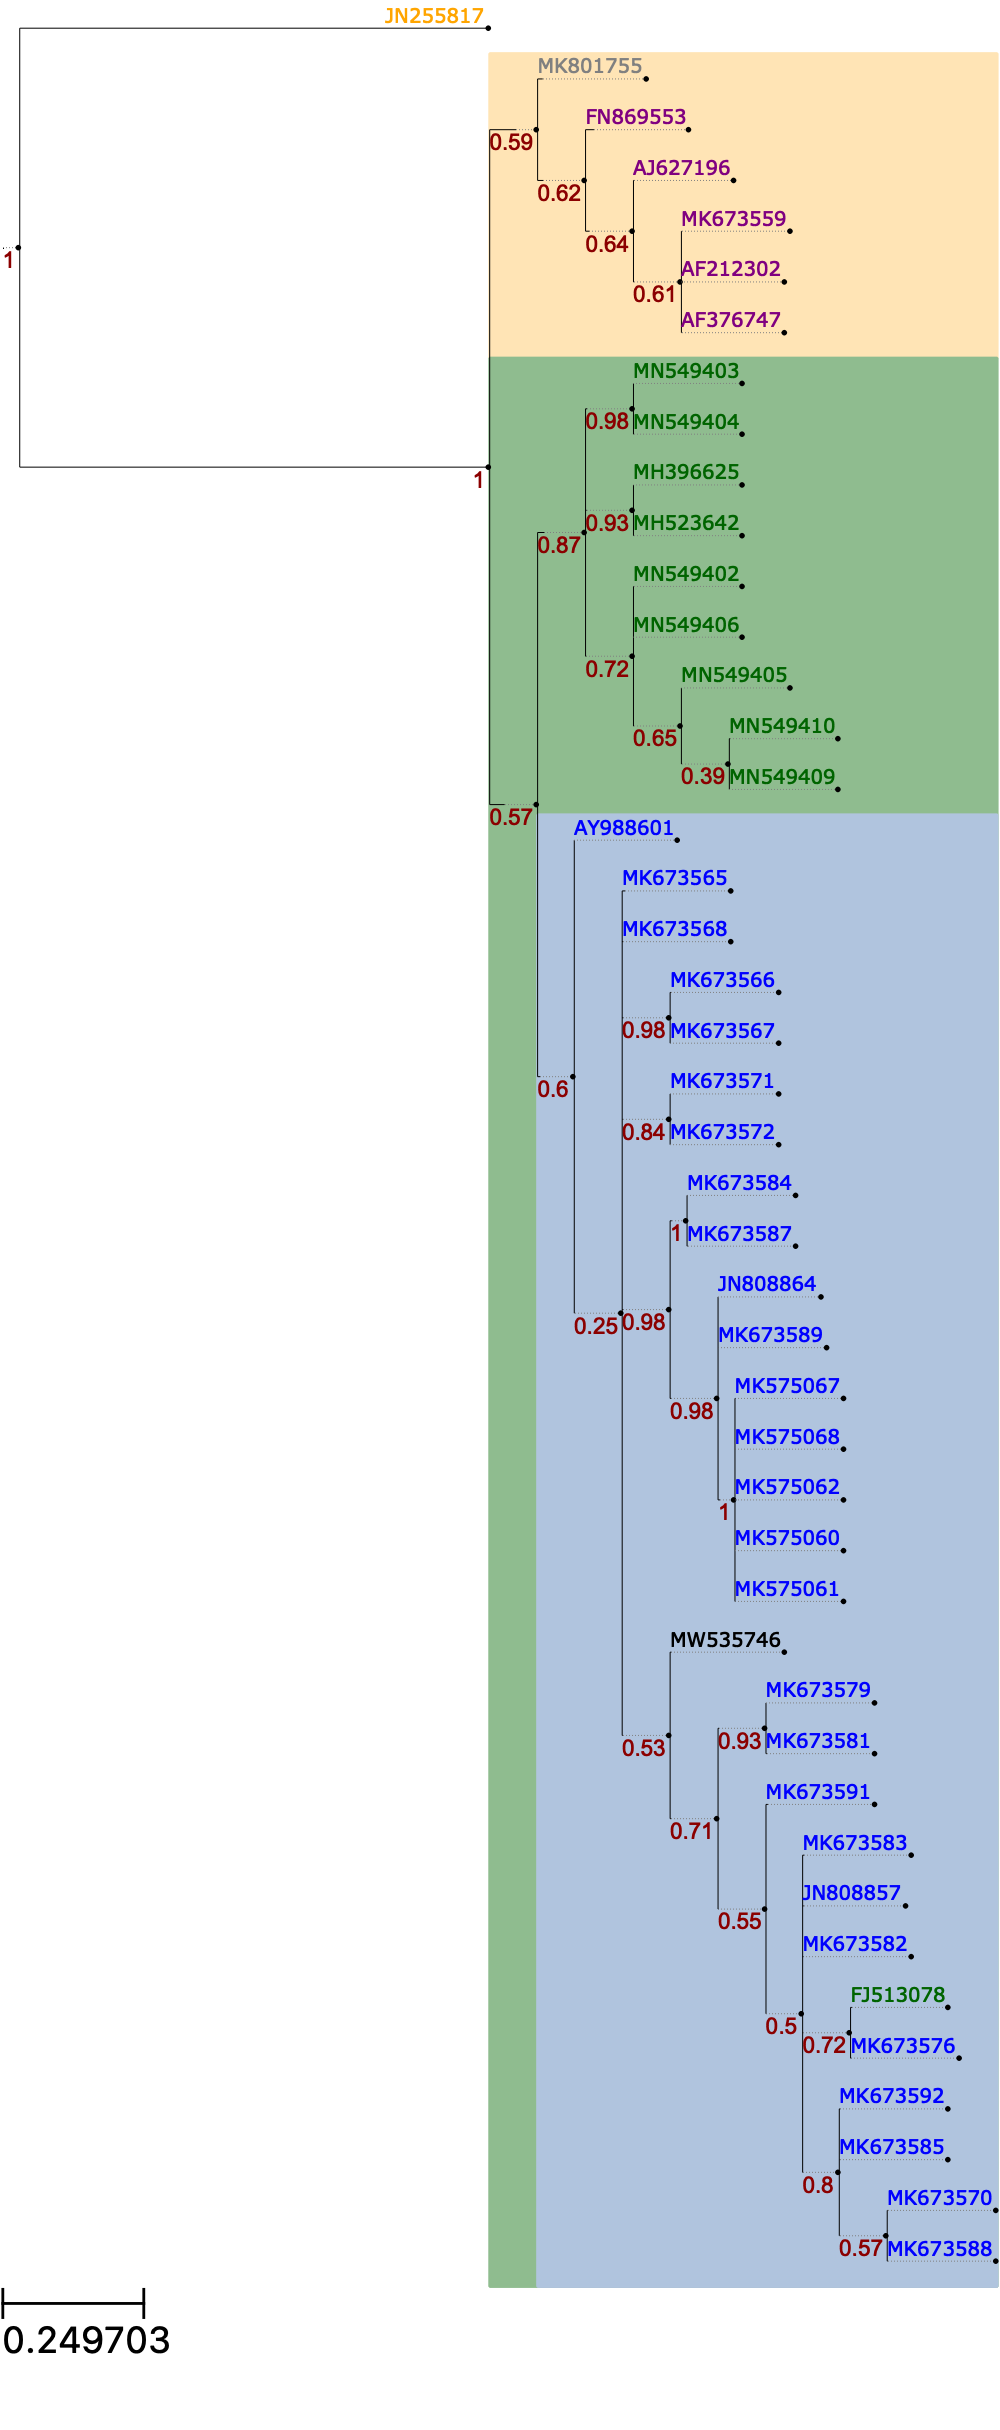

In [8]:
t, ts = tree_with_color_swatches("trees/P_no_stop_codons_HeV_iqtree.nwk", country_color_dict, "JN255817")
t.render(w=1000, tree_style=ts,
         #file_name="trees/Figures/P_HeV_polytomies.png", 
         file_name="%%inline"
         )

In [9]:
BGD_seqs = [seq.id for seq in SeqIO.parse("seq_for_analysis/P_whitmer_BGD_dedup.fasta", "fasta")]

B_metadata = pd.read_csv("metadata_all.csv").query("ID in @BGD_seqs").reset_index(drop=True)
B_metadata["clade_color"] = B_metadata["Clade"].map({"B-1": "blue", "B-2": "red"})
B_clade_color_dict = dict(zip(B_metadata["ID"], B_metadata["clade_color"]))

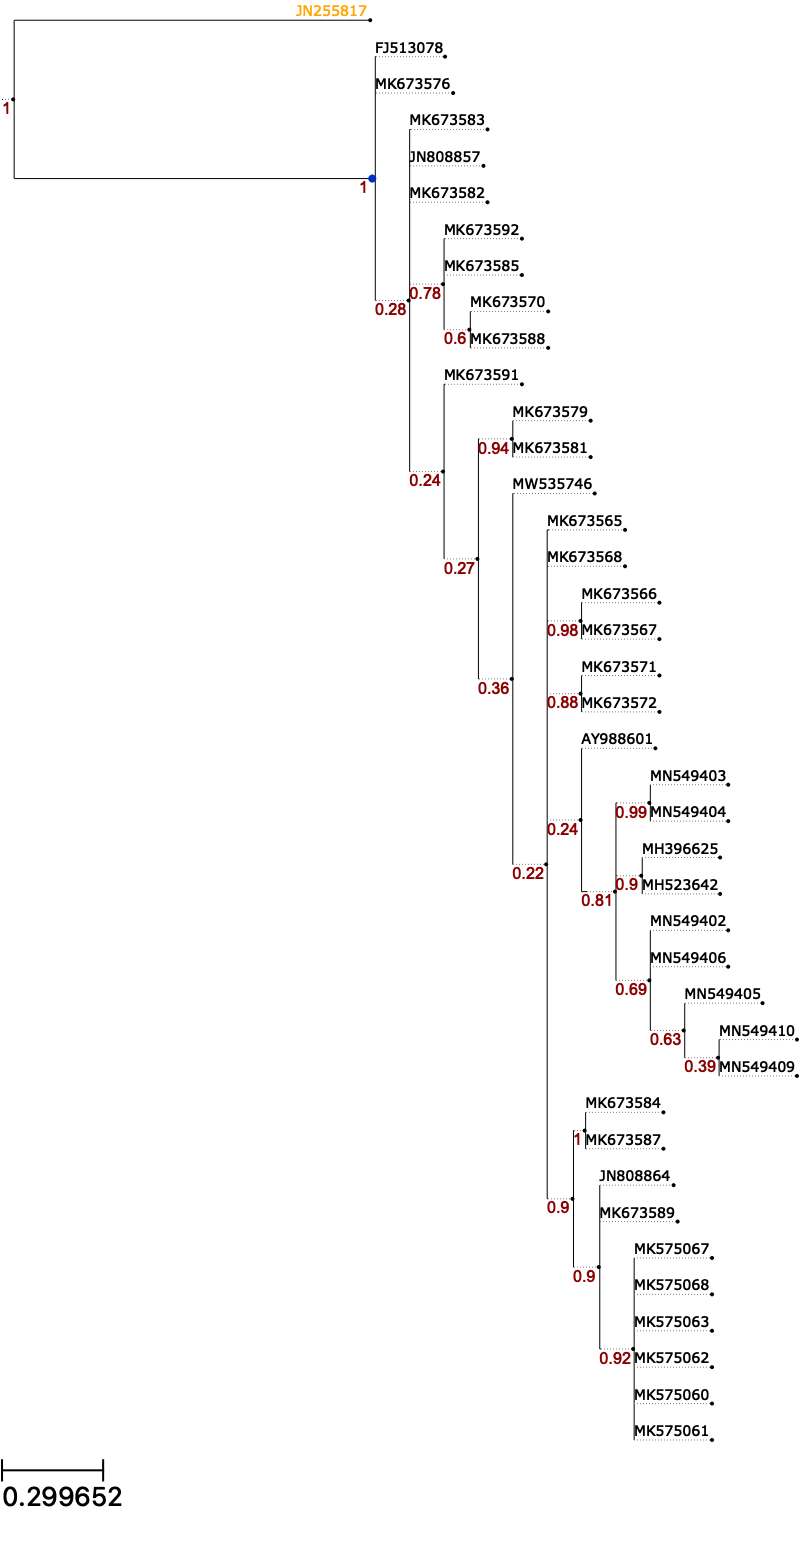

In [10]:
t, ts = basic_tree("trees/P_BGD_dedup_HeV_iqtree.nwk", {"JN255817": "orange"})

R = t.get_midpoint_outgroup()
# and set it as tree outgroup
t.set_outgroup(R)

t.render(w=800, tree_style=ts,
         #file_name="trees/Figures/P_whitmer.png", 
         file_name="%%inline"
         )

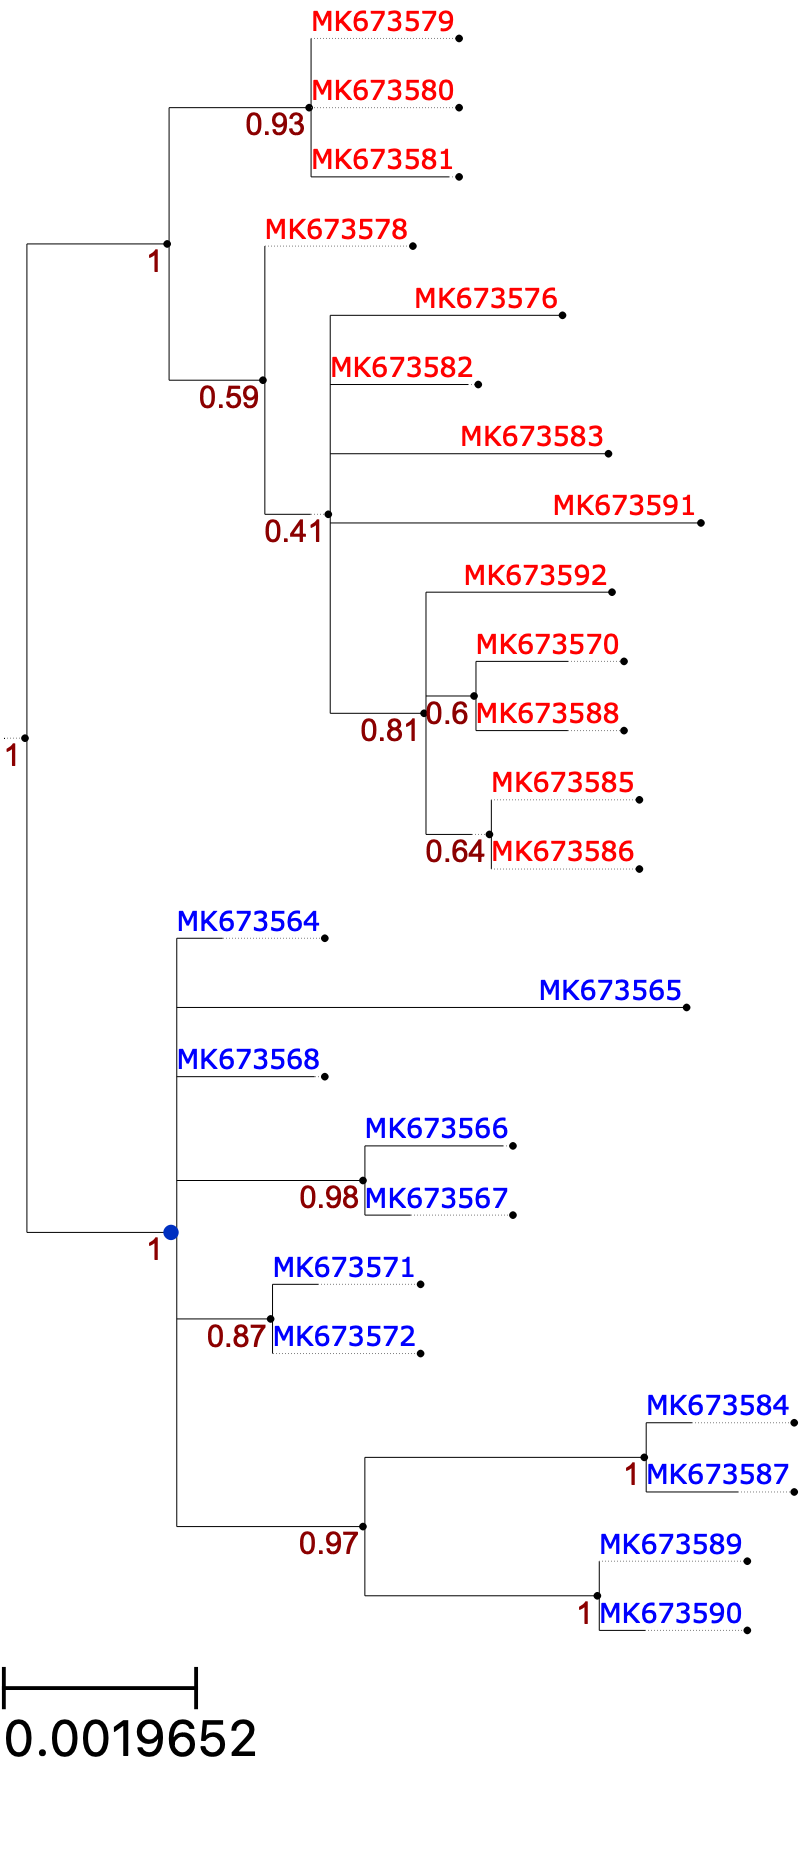

In [11]:
t, ts = basic_tree("trees/P_whitmer_BGD_dedup_iqtree.nwk", B_clade_color_dict)

R = t.get_midpoint_outgroup()
# and set it as tree outgroup
t.set_outgroup(R)

t.render(w=800, tree_style=ts,
         #file_name="trees/Figures/P_whitmer.png", 
         file_name="%%inline"
         )